# Problem Statement:

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

**Attribute Information:**

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
 - building_windows_float_processed
 - building_windows_non_float_processed
 - vehicle_windows_float_processed
 - vehicle_windows_non_float_processed (none in this database)
 - containers
 - tableware
 - headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

**Predict:** Type of glass

# 1. Importing the necessary libraries:

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. Importing the dataset:

In [56]:
# Displaying the maximum rows
pd.set_option('display.max_rows',None) 

# Displaying the maximum columns
pd.set_option('display.max_columns',None) 

data=pd.read_csv('glass_identification.csv')

In [68]:
# First five rows of the dataset
features = data.columns[:-1].tolist()
data.head() 

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [59]:
# last five rows of the dataset
data.tail() 

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# 3. Checking the attributes:

In [60]:
# Shape of the dataset
data.shape

(214, 11)

In [63]:
# Brief information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID Number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [64]:
# Statistical summary of the dataset
data.describe()

,ID Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# 4. Filling the Null values:

In [65]:
# Cheacking the null values
data.isnull().sum()     

ID Number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

# 5. Exploratory Data Analysis:

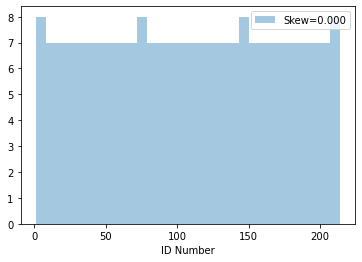

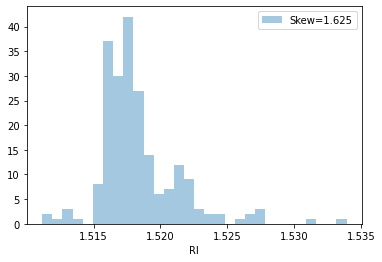

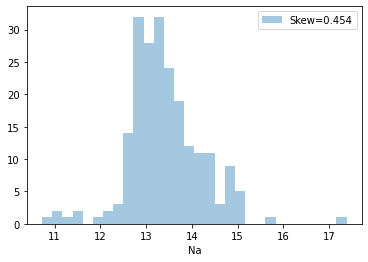

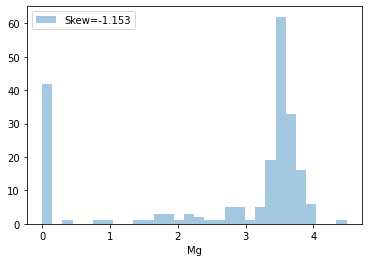

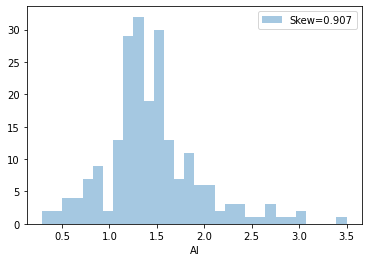

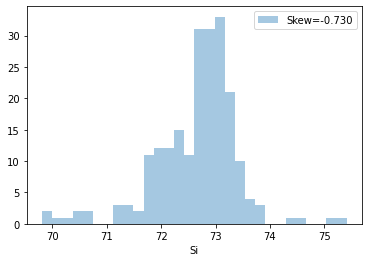

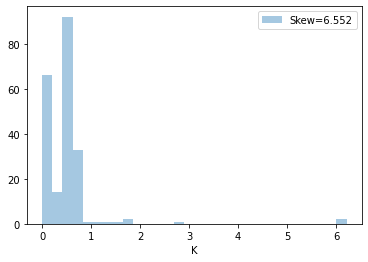

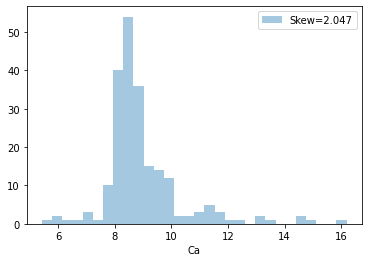

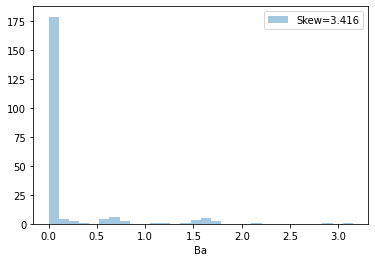

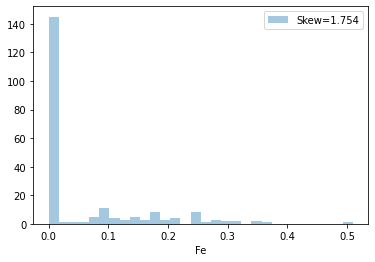

In [69]:
# Univariate Plots
for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat],kde=False, label='Skew=%.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Before removing the outliers, let's first check the box plot for each feature.

In [71]:
feature_names = data.columns
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Type',y=feature_names[i])

ValueError: Could not interpret input 'Type'

<Figure size 432x288 with 0 Axes>